In [1]:
%matplotlib notebook
import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [2]:
import unittest
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from deepART import ProbART, base, dataset
from sklearn.datasets import make_moons

/usr/local/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Generate dataset

In [3]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=200, n_features=2, centers=np.array([[0.7, 0.55], [0.95,0.95]]), cluster_std=0.03, center_box=(0, 1), shuffle=True, random_state=100)
sample_data = dataset.Dataset(x)
# np.random.seed(0)
# cluster_1 = np.random.uniform(low=0, high=0.65, size=(50, 2))
# cluster_2 = np.random.uniform(low=0.35, high=1, size=(50, 2))
# x = np.vstack((cluster_1, cluster_2))
# y = np.array(([0] * 50) + ([1] * 50))
# sample_data = dataset.Dataset(x)

In [4]:
# np.random.seed(0)
# sample_data = dataset.Clusters2d_overlap(nclusters=2,overlap=0.8,spread=0.3, npoints=100, data_range=[0.6,1])
#sample_data = dataset.TwoSpirals(100, noise=1)

# X, y = make_moons(n_samples=200, noise=0.05)
# sample_data = dataset.Dataset(X+0.5)

#npoints = 200
#sample_data = dataset.TwoSpirals(npoints, noise=30)

<IPython.core.display.Javascript object>


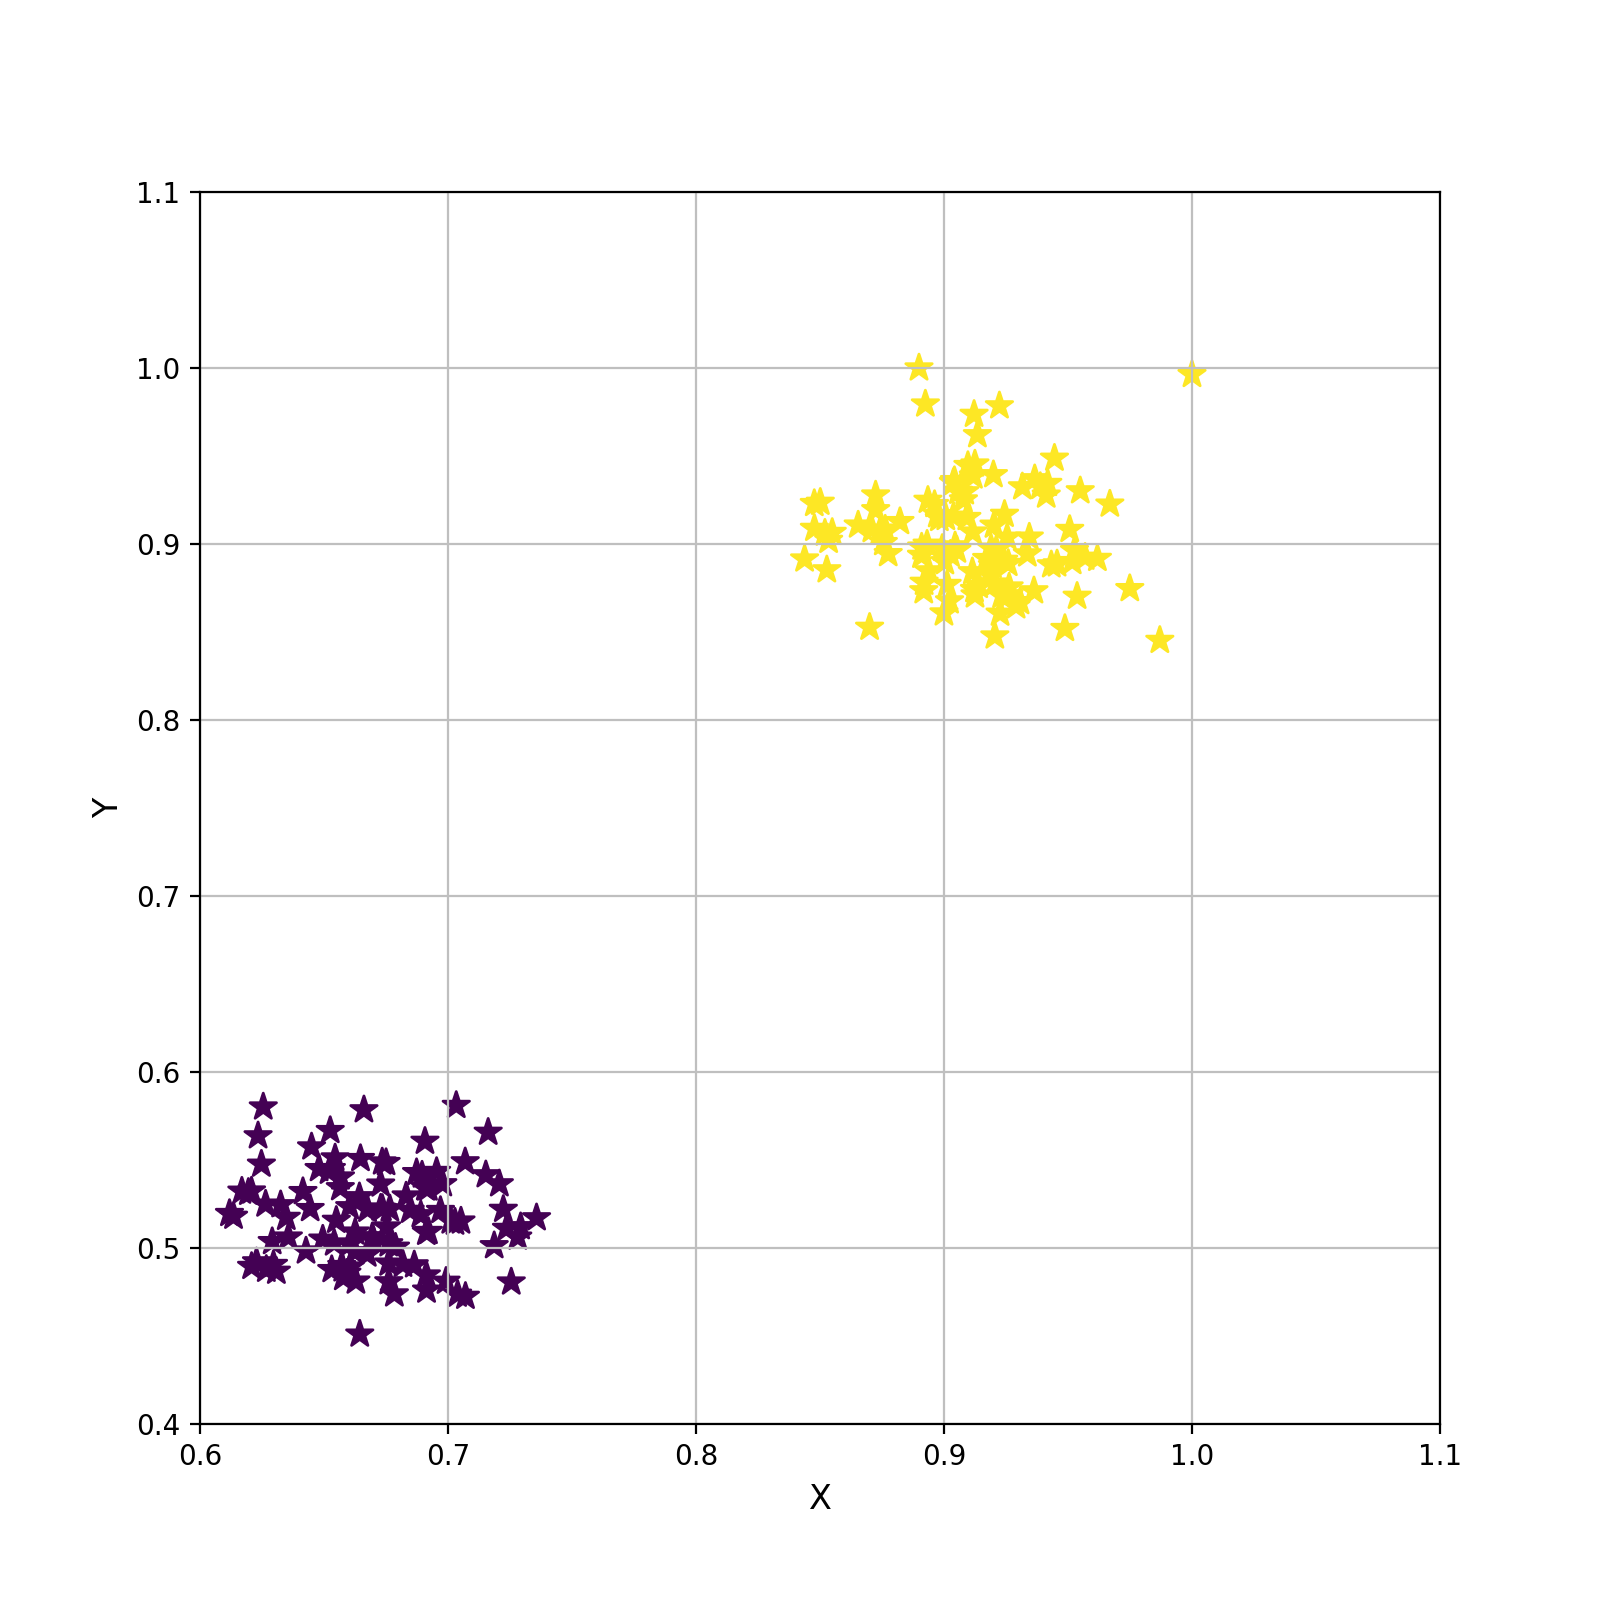

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
# scatter with colormap mapping
ax.scatter(sample_data.data_normalized[...,0],sample_data.data_normalized[...,1],s=100,c=y,marker='*')
ax.axis((0, 1, 0, 1))
plt.ylim(0.4, 1.1)
plt.xlim(0.6, 1.1)
plt.show()
#fig.savefig('data_raw.png', bbox_inches='tight')

In [6]:
convergence = 10
neurons = 50
rho = 0.7
beta = 0.75
alpha = 0.1
network = ProbART( 2, neurons, rho=rho,alpha=alpha, beta=beta,comp=True)
print("Start testing...")


#convergence tracking variables
prev_active = 0
converge = 0
results = []
while True:
    for I in sample_data.data_normalized:
        print(I.ravel())
        Z, k = network.fit_predict(I.ravel()) 
        if not k==None:
            print("zJ:\t{}\n".format(Z))
            print("Cluster:\t{}\n".format(k))
            print("\n\n\n\n")
        else:
            print("Unrecognized pattern:\n")



    if (prev_active < network.active):
        prev_active = network.active
        continue
    else:
        converge +=1
        if converge > convergence:
            print("Total Neurons Learned: {}\n\n".format(network.active))
            break

Start testing...
[0.8724329  0.92781126]
zJ:	[[0.87243289 0.92781126]
 [0.12756711 0.07218874]]

Cluster:	0






[0.6735282  0.52247524]
Unrecognized pattern:

[0.9506899 0.9082395]
zJ:	[array([[0.87243289, 0.91384821],
       [0.07173635, 0.07218874]])]

Cluster:	[(0, 0.9512374310969633)]






[0.89198935 0.8782117 ]
zJ:	[array([[0.87243289, 0.88876587],
       [0.07173635, 0.07218874]])]

Cluster:	[(0, 0.9384503923000899)]






[0.6895355  0.54139477]
zJ:	[array([[0.67352819, 0.52247524],
       [0.31524208, 0.46425199]])]

Cluster:	[(1, 0.9353837360406213)]






[0.87629   0.9084384]
zJ:	[array([[0.87243289, 0.88876587],
       [0.07173635, 0.07218874]])]

Cluster:	[(0, 0.9449759282667822)]






[0.9092036  0.91503614]
zJ:	[array([[0.87243289, 0.88876587],
       [0.07173635, 0.07218874]])]

Cluster:	[(0, 0.9545119979682025)]






[0.86539006 0.91073793]
zJ:	[array([[0.86746134, 0.88876587],
       [0.07173635, 0.07218874]])]

Cluster:	[(0, 0.9412025215991215)]






[0.851980


[0.8938281 0.8847168]
zJ:	[array([[0.84849593, 0.85342311],
       [0.0094062 , 0.01210714]])]

Cluster:	[(0, 0.9426775422333905)]






[0.6541004  0.50282407]
zJ:	[array([[0.59308014, 0.45771699],
       [0.27442997, 0.44432708]])]

Cluster:	[(1, 0.9597682864318575)]






[0.9668685  0.92263937]
zJ:	[array([[0.84849593, 0.85342311],
       [0.0094062 , 0.01210714]])]

Cluster:	[(0, 0.9685681422284071)]






[0.9226093 0.8606682]
zJ:	[array([[0.84849593, 0.85342311],
       [0.0094062 , 0.01210714]])]

Cluster:	[(0, 0.9441077577256667)]






[0.7070334  0.47251186]
zJ:	[array([[0.59308014, 0.45771699],
       [0.27442997, 0.44432708]])]

Cluster:	[(1, 0.9543910602797938)]






[0.7033244  0.58098334]
zJ:	[array([[0.59308014, 0.45771699],
       [0.27442997, 0.4270364 ]])]

Cluster:	[(1, 0.9108597692305507)]






[0.6415037  0.53201914]
zJ:	[array([[0.59308014, 0.45771699],
       [0.27442997, 0.4270364 ]])]

Cluster:	[(1, 0.9557317500576936)]






[0.6761104  0.50234723]
zJ:	[a


[0.6531134 0.4877016]
zJ:	[array([[0.59308014, 0.45771699],
       [0.26658776, 0.42085242]])]

Cluster:	[(1, 0.962414766619479)]






[0.7038725 0.473721 ]
zJ:	[array([[0.59308014, 0.45771699],
       [0.26658776, 0.42085242]])]

Cluster:	[(1, 0.9537967556700944)]






[0.6118861  0.51957893]
zJ:	[array([[0.59308014, 0.45771699],
       [0.26658776, 0.42085242]])]

Cluster:	[(1, 0.9643464827295155)]






[0.7235898 0.5111147]
zJ:	[array([[0.59308014, 0.45771699],
       [0.26658776, 0.42085242]])]

Cluster:	[(1, 0.9366044355145186)]






[0.9432628  0.88813376]
zJ:	[array([[0.84523949, 0.84740029],
       [0.0094062 , 0.00335089]])]

Cluster:	[(0, 0.9515470263616392)]






[0.9096386 0.9445605]
zJ:	[array([[0.84523949, 0.84740029],
       [0.0094062 , 0.00335089]])]

Cluster:	[(0, 0.9572548837999995)]






[0.9749134 0.8746202]
zJ:	[array([[0.84523949, 0.84740029],
       [0.0094062 , 0.00335089]])]

Cluster:	[(0, 0.9561418724303408)]






[0.9182498  0.88274163]
zJ:	[array([[


[0.72550386 0.4806429 ]
zJ:	[array([[0.58676516, 0.4528802 ],
       [0.26658776, 0.4195898 ]])]

Cluster:	[(1, 0.9460901891731083)]






[0.9058188  0.92992604]
zJ:	[array([[0.84423686, 0.8458358 ],
       [0.00249244, 0.00092554]])]

Cluster:	[(0, 0.9533318032687367)]






[0.6908809 0.5342496]
zJ:	[array([[0.58676516, 0.4528802 ],
       [0.26658776, 0.4195898 ]])]

Cluster:	[(1, 0.9400850525117794)]






[0.8534789 0.9020544]
zJ:	[array([[0.84423686, 0.8458358 ],
       [0.00249244, 0.00092554]])]

Cluster:	[(0, 0.9276837142375374)]






[0.7357046  0.51714045]
zJ:	[array([[0.58676516, 0.4528802 ],
       [0.26498962, 0.4195898 ]])]

Cluster:	[(1, 0.9295439987445301)]






[0.635628  0.5061949]
zJ:	[array([[0.58676516, 0.4528802 ],
       [0.26498962, 0.4195898 ]])]

Cluster:	[(1, 0.9624611026179436)]






[0.7011189 0.51531  ]
zJ:	[array([[0.58676516, 0.4528802 ],
       [0.26498962, 0.4195898 ]])]

Cluster:	[(1, 0.9428920326172537)]






[0.6267388 0.48786  ]
zJ:	[array([

[0.6699372 0.5043962]
zJ:	[array([[0.5850356 , 0.45155082],
       [0.26498962, 0.4195898 ]])]

Cluster:	[(1, 0.9550139661967941)]






[0.69920254 0.4810769 ]
zJ:	[array([[0.5850356 , 0.45155082],
       [0.26498962, 0.4195898 ]])]

Cluster:	[(1, 0.9534809843908953)]






[0.94558173 0.8886818 ]
zJ:	[array([[8.44236864e-01, 8.45835803e-01],
       [6.58988960e-04, 9.25541205e-04]])]

Cluster:	[(0, 0.9529250304086815)]






[0.6495086 0.50501  ]
zJ:	[array([[0.5850356 , 0.45155082],
       [0.26498962, 0.4195898 ]])]

Cluster:	[(1, 0.9597821039914568)]






[0.69134206 0.47603166]
zJ:	[array([[0.5850356 , 0.45155082],
       [0.26498962, 0.4195898 ]])]

Cluster:	[(1, 0.9567471364603116)]






[0.9115784  0.90676534]
zJ:	[array([[8.44236864e-01, 8.45835803e-01],
       [6.58988960e-04, 9.25541205e-04]])]

Cluster:	[(0, 0.9485933129484365)]






[0.9012583  0.87699807]
zJ:	[array([[8.44236864e-01, 8.45835803e-01],
       [6.58988960e-04, 9.25541205e-04]])]

Cluster:	[(0, 0.93596093

zJ:	[array([[0.5850356 , 0.45155082],
       [0.2645054 , 0.41919559]])]

Cluster:	[(1, 0.9368356136920036)]






[0.9432628  0.88813376]
zJ:	[array([[8.43925300e-01, 8.45388342e-01],
       [6.58988960e-04, 2.55461262e-04]])]

Cluster:	[(0, 0.9520020267351095)]






[0.9096386 0.9445605]
zJ:	[array([[8.43925300e-01, 8.45388342e-01],
       [6.58988960e-04, 2.55461262e-04]])]

Cluster:	[(0, 0.9577138160063445)]






[0.9749134 0.8746202]
zJ:	[array([[8.43925300e-01, 8.45388342e-01],
       [6.58988960e-04, 2.55461262e-04]])]

Cluster:	[(0, 0.9566006546888022)]






[0.9182498  0.88274163]
zJ:	[array([[8.43925300e-01, 8.45388342e-01],
       [6.58988960e-04, 2.55461262e-04]])]

Cluster:	[(0, 0.9432401134143548)]






[0.92061776 0.87778884]
zJ:	[array([[8.43925300e-01, 8.45388342e-01],
       [6.58988960e-04, 2.55461262e-04]])]

Cluster:	[(0, 0.9424295015175271)]






[0.6529765  0.54509383]
zJ:	[array([[0.5850356 , 0.45155082],
       [0.2645054 , 0.41919559]])]

Cluster:	[(1, 0.


[0.92547506 0.903828  ]
zJ:	[array([[8.43925300e-01, 8.45388342e-01],
       [1.74135447e-04, 2.55461262e-04]])]

Cluster:	[(0, 0.9514910023853412)]






[0.86999744 0.85264635]
zJ:	[array([[8.43925300e-01, 8.45388342e-01],
       [1.74135447e-04, 2.55461262e-04]])]

Cluster:	[(0, 0.9133568771845824)]






[0.6525062  0.56670725]
zJ:	[array([[0.58456296, 0.4511861 ],
       [0.2645054 , 0.41907252]])]

Cluster:	[(1, 0.9420795973669749)]






[0.8437848  0.89145476]
zJ:	[array([[8.43828473e-01, 8.45388342e-01],
       [1.74135447e-04, 2.55461262e-04]])]

Cluster:	[(0, 0.9189399013780171)]






[0.6195044 0.5315971]
zJ:	[array([[0.58456296, 0.4511861 ],
       [0.2645054 , 0.41907252]])]

Cluster:	[(1, 0.9605076419165742)]






[0.85492265 0.90655535]
zJ:	[array([[8.43828473e-01, 8.45388342e-01],
       [1.74135447e-04, 2.55461262e-04]])]

Cluster:	[(0, 0.9296543133937727)]






[0.64441735 0.5223735 ]
zJ:	[array([[0.58456296, 0.4511861 ],
       [0.2645054 , 0.41907252]])]

Clust


[0.9025972 0.8941845]
zJ:	[array([[8.43828473e-01, 8.45260432e-01],
       [4.60079778e-05, 7.04982955e-05]])]

Cluster:	[(0, 0.9419276044290972)]






[0.66020435 0.502225  ]
zJ:	[array([[0.58456296, 0.4511861 ],
       [0.2643589 , 0.41907252]])]

Cluster:	[(1, 0.9578921651836084)]






[0.9184181  0.89093316]
zJ:	[array([[8.43828473e-01, 8.45260432e-01],
       [4.60079778e-05, 7.04982955e-05]])]

Cluster:	[(0, 0.9458037255686772)]






[0.6565807 0.5342296]
zJ:	[array([[0.58456296, 0.4511861 ],
       [0.2643589 , 0.41907252]])]

Cluster:	[(1, 0.9505769226355434)]






[0.5843854 0.5227913]
zJ:	[array([[0.58443388, 0.4511861 ],
       [0.2643589 , 0.41907252]])]

Cluster:	[(1, 0.9692489839996109)]






[0.91993123 0.93935716]
zJ:	[array([[8.43828473e-01, 8.45260432e-01],
       [4.60079778e-05, 7.04982955e-05]])]

Cluster:	[(0, 0.958926147158395)]






[0.6783681  0.47388372]
zJ:	[array([[0.58443388, 0.4511861 ],
       [0.2643589 , 0.41907252]])]

Cluster:	[(1, 0.9602530944

[0.71862566 0.5012875 ]
zJ:	[array([[0.58443388, 0.45108609],
       [0.2643146 , 0.4190341 ]])]

Cluster:	[(1, 0.9418208012988813)]






[0.9210698 0.8968246]
zJ:	[array([[8.43798380e-01, 8.45223872e-01],
       [4.60079778e-05, 1.94542257e-05]])]

Cluster:	[(0, 0.9483020676719663)]






[0.7069333 0.5489487]
zJ:	[array([[0.58443388, 0.45108609],
       [0.2643146 , 0.4190341 ]])]

Cluster:	[(1, 0.9290076627367324)]






[0.65496176 0.515693  ]
zJ:	[array([[0.58443388, 0.45108609],
       [0.2643146 , 0.4190341 ]])]

Cluster:	[(1, 0.9558763244350041)]






[0.9201508  0.91067994]
zJ:	[array([[8.43798380e-01, 8.45223872e-01],
       [4.60079778e-05, 1.94542257e-05]])]

Cluster:	[(0, 0.9518730387091634)]






[0.6831112  0.52952796]
zJ:	[array([[0.58443388, 0.45108609],
       [0.2643146 , 0.4190341 ]])]

Cluster:	[(1, 0.9441339026551433)]






[0.67655396 0.52222866]
zJ:	[array([[0.58443388, 0.45108609],
       [0.2643146 , 0.4190341 ]])]

Cluster:	[(1, 0.9483026135229553)]








[0.7070334  0.47251186]
zJ:	[array([[0.58439863, 0.45105867],
       [0.2643146 , 0.4190341 ]])]

Cluster:	[(1, 0.9536069726687335)]






[0.7033244  0.58098334]
zJ:	[array([[0.58439863, 0.45105867],
       [0.2643146 , 0.4190221 ]])]

Cluster:	[(1, 0.9170848338053254)]






[0.6415037  0.53201914]
zJ:	[array([[0.58439863, 0.45105867],
       [0.2643146 , 0.4190221 ]])]

Cluster:	[(1, 0.9551575418786105)]






[0.6761104  0.50234723]
zJ:	[array([[0.58439863, 0.45105867],
       [0.2643146 , 0.4190221 ]])]

Cluster:	[(1, 0.9538906304434218)]






[0.70522964 0.5152881 ]
zJ:	[array([[0.58439863, 0.45105867],
       [0.2643146 , 0.4190221 ]])]

Cluster:	[(1, 0.9416271071651775)]






[0.6347889 0.5173666]
zJ:	[array([[0.58439863, 0.45105867],
       [0.2643146 , 0.4190221 ]])]

Cluster:	[(1, 0.9602698310770658)]






[0.7152544 0.5415798]
zJ:	[array([[0.58439863, 0.45105867],
       [0.2643146 , 0.4190221 ]])]

Cluster:	[(1, 0.9286381031765384)]






[0.6603633 0.5234277]
zJ:	[arr


Cluster:	[(0, 0.932134913140742)]






[0.68732303 0.54279846]
zJ:	[array([[0.58438901, 0.45105867],
       [0.26430121, 0.4190221 ]])]

Cluster:	[(1, 0.9384229020038262)]






[0.9042076 0.9359941]
zJ:	[array([[8.43789027e-01, 8.45213423e-01],
       [3.21135702e-06, 5.36840239e-06]])]

Cluster:	[(0, 0.9543135019537267)]






[0.9412219 0.9277529]
zJ:	[array([[8.43789027e-01, 8.45213423e-01],
       [3.21135702e-06, 5.36840239e-06]])]

Cluster:	[(0, 0.9610877594731596)]






[0.6863912  0.49040365]
zJ:	[array([[0.58438901, 0.45105867],
       [0.26430121, 0.4190221 ]])]

Cluster:	[(1, 0.9543197297246189)]






[0.93067324 0.8672241 ]
zJ:	[array([[8.43789027e-01, 8.45213423e-01],
       [3.21135702e-06, 5.36840239e-06]])]

Cluster:	[(0, 0.9422865767853663)]






[0.89618856 0.92239887]
zJ:	[array([[8.43789027e-01, 8.45213423e-01],
       [3.21135702e-06, 5.36840239e-06]])]

Cluster:	[(0, 0.9485006594086975)]






[0.62475926 0.5476023 ]
zJ:	[array([[0.58438901, 0.45105867],
   


[0.89249   0.9795026]
zJ:	[array([[8.43786120e-01, 8.45210436e-01],
       [3.21135702e-06, 1.48140993e-06]])]

Cluster:	[(0, 0.961739167457399)]






[0.9316029 0.9324428]
zJ:	[array([[8.43786120e-01, 8.45210436e-01],
       [3.21135702e-06, 1.48140993e-06]])]

Cluster:	[(0, 0.9599992775479458)]






[0.84774125 0.9088534 ]
zJ:	[array([[8.43786120e-01, 8.45210436e-01],
       [3.21135702e-06, 1.48140993e-06]])]

Cluster:	[(0, 0.9277253282452108)]






[0.6531134 0.4877016]
zJ:	[array([[0.58438901, 0.45105115],
       [0.26429715, 0.41901836]])]

Cluster:	[(1, 0.9627496414904407)]






[0.7038725 0.473721 ]
zJ:	[array([[0.58438901, 0.45105115],
       [0.26429715, 0.41901836]])]

Cluster:	[(1, 0.9541125383424218)]






[0.6118861  0.51957893]
zJ:	[array([[0.58438901, 0.45105115],
       [0.26429715, 0.41901836]])]

Cluster:	[(1, 0.9646830448730798)]






[0.7235898 0.5111147]
zJ:	[array([[0.58438901, 0.45105115],
       [0.26429715, 0.41901836]])]

Cluster:	[(1, 0.93683650209266


[0.9536719 0.8702627]
zJ:	[array([[8.43785217e-01, 8.45209583e-01],
       [8.48424541e-07, 1.48140993e-06]])]

Cluster:	[(0, 0.9500000269757131)]






[0.9121251 0.973648 ]
zJ:	[array([[8.43785217e-01, 8.45209583e-01],
       [8.48424541e-07, 1.48140993e-06]])]

Cluster:	[(0, 0.9645854642152342)]






[0.6912672  0.48464054]
zJ:	[array([[0.58438638, 0.45104909],
       [0.26429715, 0.41901719]])]

Cluster:	[(1, 0.9545469789376874)]






[0.9007301  0.91503966]
zJ:	[array([[8.43785217e-01, 8.45209583e-01],
       [8.48424541e-07, 1.48140993e-06]])]

Cluster:	[(0, 0.9476924399230046)]






[0.9418505  0.93438274]
zJ:	[array([[8.43785217e-01, 8.45209583e-01],
       [8.48424541e-07, 1.48140993e-06]])]

Cluster:	[(0, 0.9626377895509468)]






[0.7028223 0.5146576]
zJ:	[array([[0.58438638, 0.45104909],
       [0.26429715, 0.41901719]])]

Cluster:	[(1, 0.9426033835588649)]






[0.6661049 0.5784944]
zJ:	[array([[0.58438638, 0.45104909],
       [0.26429715, 0.41901719]])]

Cluster:	[(

Cluster:	[(1, 0.9620591505129816)]






[1.        0.9962704]
zJ:	[array([[8.43785217e-01, 8.45209583e-01],
       [2.24149409e-07, 4.08794706e-07]])]

Cluster:	[(0, 0.9810735099465366)]






[0.6296297 0.4906129]
zJ:	[array([[0.58438638, 0.45104909],
       [0.26429593, 0.41901719]])]

Cluster:	[(1, 0.9668761681850808)]






[0.63079506 0.48676276]
zJ:	[array([[0.58438638, 0.45104909],
       [0.26429593, 0.41901719]])]

Cluster:	[(1, 0.9673810015371428)]






[0.8740794  0.90672034]
zJ:	[array([[8.43785217e-01, 8.45209583e-01],
       [2.24149409e-07, 4.08794706e-07]])]

Cluster:	[(0, 0.9366256784551837)]






[0.68473864 0.52137774]
zJ:	[array([[0.58438638, 0.45104909],
       [0.26429593, 0.41901719]])]

Cluster:	[(1, 0.9461336622010551)]






[0.9025972 0.8941845]
zJ:	[array([[8.43785217e-01, 8.45209583e-01],
       [2.24149409e-07, 4.08794706e-07]])]

Cluster:	[(0, 0.9419310575234323)]






[0.66020435 0.502225  ]
zJ:	[array([[0.58438638, 0.45104909],
       [0.26429593, 0

zJ:	[array([[0.58438566, 0.45104853],
       [0.26429593, 0.41901682]])]

Cluster:	[(1, 0.9332831280200539)]






[0.6647105 0.5507986]
zJ:	[array([[0.58438566, 0.45104853],
       [0.26429593, 0.41901682]])]

Cluster:	[(1, 0.9432308510952631)]






[0.6520283 0.5435664]
zJ:	[array([[0.58438566, 0.45104853],
       [0.26429593, 0.41901682]])]

Cluster:	[(1, 0.9492186826152587)]






[0.91346765 0.96206456]
zJ:	[array([[8.43784936e-01, 8.45209339e-01],
       [2.24149409e-07, 4.08794706e-07]])]

Cluster:	[(0, 0.9624905441801292)]






[0.91246176 0.94541997]
zJ:	[array([[8.43784936e-01, 8.45209339e-01],
       [2.24149409e-07, 4.08794706e-07]])]

Cluster:	[(0, 0.9585978094041793)]






[0.85011333 0.923675  ]
zJ:	[array([[8.43784936e-01, 8.45209339e-01],
       [2.24149409e-07, 4.08794706e-07]])]

Cluster:	[(0, 0.9341582929415683)]






[0.9195243  0.88768435]
zJ:	[array([[8.43784936e-01, 8.45209339e-01],
       [2.24149409e-07, 4.08794706e-07]])]

Cluster:	[(0, 0.9451647810999797


[0.66754514 0.52195567]
zJ:	[array([[0.58438566, 0.45104853],
       [0.26429556, 0.41901682]])]

Cluster:	[(1, 0.9509283121556849)]






[0.66287553 0.4811658 ]
zJ:	[array([[0.58438566, 0.45104853],
       [0.26429556, 0.41901682]])]

Cluster:	[(1, 0.9620591337417788)]






[1.        0.9962704]
zJ:	[array([[8.43784936e-01, 8.45209339e-01],
       [5.92191150e-08, 1.12806792e-07]])]

Cluster:	[(0, 0.9810735601358938)]






[0.6296297 0.4906129]
zJ:	[array([[0.58438566, 0.45104853],
       [0.26429556, 0.41901682]])]

Cluster:	[(1, 0.9668761248744581)]






[0.63079506 0.48676276]
zJ:	[array([[0.58438566, 0.45104853],
       [0.26429556, 0.41901682]])]

Cluster:	[(1, 0.9673809591727816)]






[0.8740794  0.90672034]
zJ:	[array([[8.43784936e-01, 8.45209339e-01],
       [5.92191150e-08, 1.12806792e-07]])]

Cluster:	[(0, 0.9366256265065338)]






[0.68473864 0.52137774]
zJ:	[array([[0.58438566, 0.45104853],
       [0.26429556, 0.41901682]])]

Cluster:	[(1, 0.9461335773454894)]






[0.9487433 0.8519687]
zJ:	[array([[8.43784848e-01, 8.45209269e-01],
       [5.92191150e-08, 3.11290045e-08]])]

Cluster:	[(0, 0.9431703800090333)]






[0.92626405 0.8755473 ]
zJ:	[array([[8.43784848e-01, 8.45209269e-01],
       [5.92191150e-08, 3.11290045e-08]])]

Cluster:	[(0, 0.9435125775316823)]






[0.8822437 0.9127058]
zJ:	[array([[8.43784848e-01, 8.45209269e-01],
       [5.92191150e-08, 3.11290045e-08]])]

Cluster:	[(0, 0.9413445842985662)]






[0.95169765 0.8899968 ]
zJ:	[array([[8.43784848e-01, 8.45209269e-01],
       [5.92191150e-08, 3.11290045e-08]])]

Cluster:	[(0, 0.9546902334918507)]






[0.66054726 0.4891735 ]
zJ:	[array([[0.58438547, 0.45104837],
       [0.26429545, 0.41901671]])]

Cluster:	[(1, 0.9608137012415394)]






[0.7161962 0.5657235]
zJ:	[array([[0.58438547, 0.45104837],
       [0.26429545, 0.41901671]])]

Cluster:	[(1, 0.9181522846709123)]






[0.9388331 0.9326438]
zJ:	[array([[8.43784848e-01, 8.45209269e-01],
       [5.92191150e-08, 3.11290045e-08]]


[0.8938281 0.8847168]
zJ:	[array([[8.43784848e-01, 8.45209269e-01],
       [1.56453835e-08, 3.11290045e-08]])]

Cluster:	[(0, 0.9358416527676332)]






[0.6541004  0.50282407]
zJ:	[array([[0.58438542, 0.45104833],
       [0.26429545, 0.41901671]])]

Cluster:	[(1, 0.9591775378410761)]






[0.9668685  0.92263937]
zJ:	[array([[8.43784848e-01, 8.45209269e-01],
       [1.56453835e-08, 3.11290045e-08]])]

Cluster:	[(0, 0.9653208450049112)]






[0.9226093 0.8606682]
zJ:	[array([[8.43784848e-01, 8.45209269e-01],
       [1.56453835e-08, 3.11290045e-08]])]

Cluster:	[(0, 0.9374767809121131)]






[0.7070334  0.47251186]
zJ:	[array([[0.58438542, 0.45104833],
       [0.26429545, 0.41901671]])]

Cluster:	[(1, 0.9536043386681261)]






[0.7033244  0.58098334]
zJ:	[array([[0.58438542, 0.45104833],
       [0.26429545, 0.41901668]])]

Cluster:	[(1, 0.9170844869327217)]






[0.6415037  0.53201914]
zJ:	[array([[0.58438542, 0.45104833],
       [0.26429545, 0.41901668]])]

Cluster:	[(1, 0.9551551


[0.934394  0.9038885]
zJ:	[array([[8.43784821e-01, 8.45209249e-01],
       [1.56453835e-08, 8.59004062e-09]])]

Cluster:	[(0, 0.9538228822567444)]






[0.9362679 0.8733746]
zJ:	[array([[8.43784821e-01, 8.45209249e-01],
       [1.56453835e-08, 8.59004062e-09]])]

Cluster:	[(0, 0.9458946896740595)]






[0.62076193 0.5323509 ]
zJ:	[array([[0.58438542, 0.45104833],
       [0.26429541, 0.41901668]])]

Cluster:	[(1, 0.9600512523436672)]






[0.9526097 0.8962427]
zJ:	[array([[8.43784821e-01, 8.45209249e-01],
       [1.56453835e-08, 8.59004062e-09]])]

Cluster:	[(0, 0.9564596599333178)]






[0.8476954  0.92297524]
zJ:	[array([[8.43784821e-01, 8.45209249e-01],
       [1.56453835e-08, 8.59004062e-09]])]

Cluster:	[(0, 0.9330325548387436)]






[0.9259081 0.8889245]
zJ:	[array([[8.43784821e-01, 8.45209249e-01],
       [1.56453835e-08, 8.59004062e-09]])]

Cluster:	[(0, 0.9474209134868611)]






[0.9139778 0.8764382]
zJ:	[array([[8.43784821e-01, 8.45209249e-01],
       [1.56453835e-08, 8


[0.92626405 0.8755473 ]
zJ:	[array([[8.43784813e-01, 8.45209243e-01],
       [4.13342926e-09, 2.37041947e-09]])]

Cluster:	[(0, 0.9435125687919077)]






[0.8822437 0.9127058]
zJ:	[array([[8.43784813e-01, 8.45209243e-01],
       [4.13342926e-09, 2.37041947e-09]])]

Cluster:	[(0, 0.9413445749752015)]






[0.95169765 0.8899968 ]
zJ:	[array([[8.43784813e-01, 8.45209243e-01],
       [4.13342926e-09, 2.37041947e-09]])]

Cluster:	[(0, 0.9546902276233742)]






[0.66054726 0.4891735 ]
zJ:	[array([[0.5843854 , 0.45104832],
       [0.2642954 , 0.41901666]])]

Cluster:	[(1, 0.9608136974125345)]






[0.7161962 0.5657235]
zJ:	[array([[0.5843854 , 0.45104832],
       [0.2642954 , 0.41901666]])]

Cluster:	[(1, 0.9181522718643801)]






[0.9388331 0.9326438]
zJ:	[array([[8.43784813e-01, 8.45209243e-01],
       [4.13342926e-09, 2.37041947e-09]])]

Cluster:	[(0, 0.9616284532218946)]






[0.6674422 0.4965175]
zJ:	[array([[0.5843854 , 0.45104832],
       [0.2642954 , 0.41901666]])]

Cluster:	[(

In [7]:
#PRedict
pred = []
for I in sample_data.data_normalized:
        Z, k = network.fit_predict(I.ravel(),learn=False) 
        if not k==None:
            print("zJ:\t{}\n".format(Z))
            print("Cluster:\t{}\n".format(k))
            print("\n\n")
            pred.append(k)
        else:
            print("Unrecognized pattern:\n")
            pred.append(-1)


zJ:	[array([[8.43784813e-01, 8.45209243e-01],
       [4.13342926e-09, 2.37041947e-09]])]

Cluster:	[(0, 0.9430241559447544)]




zJ:	[array([[0.5843854 , 0.45104832],
       [0.2642954 , 0.41901666]])]

Cluster:	[(1, 0.9491020314962516)]




zJ:	[array([[8.43784813e-01, 8.45209243e-01],
       [4.13342926e-09, 2.37041947e-09]])]

Cluster:	[(0, 0.9588392164777465)]




zJ:	[array([[8.43784813e-01, 8.45209243e-01],
       [4.13342926e-09, 2.37041947e-09]])]

Cluster:	[(0, 0.9328614578093571)]




zJ:	[array([[0.5843854 , 0.45104832],
       [0.2642954 , 0.41901666]])]

Cluster:	[(1, 0.9381444817359549)]




zJ:	[array([[8.43784813e-01, 8.45209243e-01],
       [4.13342926e-09, 2.37041947e-09]])]

Cluster:	[(0, 0.937970209740158)]




zJ:	[array([[8.43784813e-01, 8.45209243e-01],
       [4.13342926e-09, 2.37041947e-09]])]

Cluster:	[(0, 0.9500840899335534)]




zJ:	[array([[8.43784813e-01, 8.45209243e-01],
       [4.13342926e-09, 2.37041947e-09]])]

Cluster:	[(0, 0.9349912973391057)]




z

zJ:	[array([[0.5843854 , 0.45104832],
       [0.2642954 , 0.41901666]])]

Cluster:	[(1, 0.9605050497127857)]




zJ:	[array([[8.43784813e-01, 8.45209243e-01],
       [4.13342926e-09, 2.37041947e-09]])]

Cluster:	[(0, 0.9296088932023417)]




zJ:	[array([[0.5843854 , 0.45104832],
       [0.2642954 , 0.41901666]])]

Cluster:	[(1, 0.9568301880100252)]




zJ:	[array([[8.43784813e-01, 8.45209243e-01],
       [4.13342926e-09, 2.37041947e-09]])]

Cluster:	[(0, 0.9467658382198757)]




zJ:	[array([[0.5843854 , 0.45104832],
       [0.2642954 , 0.41901666]])]

Cluster:	[(1, 0.9554003318704831)]




zJ:	[array([[0.5843854 , 0.45104832],
       [0.2642954 , 0.41901666]])]

Cluster:	[(1, 0.9627056502659)]




zJ:	[array([[0.5843854 , 0.45104832],
       [0.2642954 , 0.41901666]])]

Cluster:	[(1, 0.9397772435875179)]




zJ:	[array([[0.5843854 , 0.45104832],
       [0.2642954 , 0.41901666]])]

Cluster:	[(1, 0.9604448747095311)]




zJ:	[array([[0.5843854 , 0.45104832],
       [0.2642954 , 0.4190166

In [8]:
res = [score for _, score in pred[0]]
idxMax = np.argmax(res)
k, _ = pred[0][idxMax]
k

0

## Generate contour plot for cluster membership


In [9]:
def unpack_results(pred,target):
    #unpack result tuples
    pred_k = []
    scores = []
    data_contour = np.empty((0,2),dtype=np.float32)
    for n, results in enumerate(pred):
        for res_tuple in results:
            k, score = res_tuple
            pred_k.append(k)

            if k == target:
                data_contour = np.vstack((data_contour, sample_data.data_normalized[n]))
                scores.append(score)
    return data_contour, scores, pred_k

In [10]:
def plot_countour(fig,data_contour, scores, sub_index, nplots=(3,2)):
    ax = fig.add_subplot(nplots[0],nplots[1],sub_index)

    ax.set_title("Clustering Results ",fontsize=14)
    ax.set_xlabel("X",fontsize=12)
    ax.set_ylabel("Y",fontsize=12)
    ax.grid(True,linestyle='-',color='0.75')
    # scatter with colormap mapping to predicted class
    ax.tricontour(data_contour[...,0], data_contour[...,1], scores, 14, linewidths=0, colors='k')
    cntr2 = ax.tricontourf(data_contour[...,0], data_contour[...,1], scores, 14, cmap="RdBu_r",)

    fig.colorbar(cntr2, ax=ax)
    ax.plot(data_contour[...,0], data_contour[...,1], 'ko', ms=0.5)
    ax.axis((0, 1, 0, 1))
    ax.set_title('Cluster {}'.format(int(sub_index-1)))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
#     fig.savefig('part_contour_{}.png'.format(sub_index), bbox_inches='tight')

In [11]:
#get unique topics
_, _, ks = unpack_results(pred,target=0)
unique_ks = set(ks)
print(unique_ks)

{0, 1}


<IPython.core.display.Javascript object>


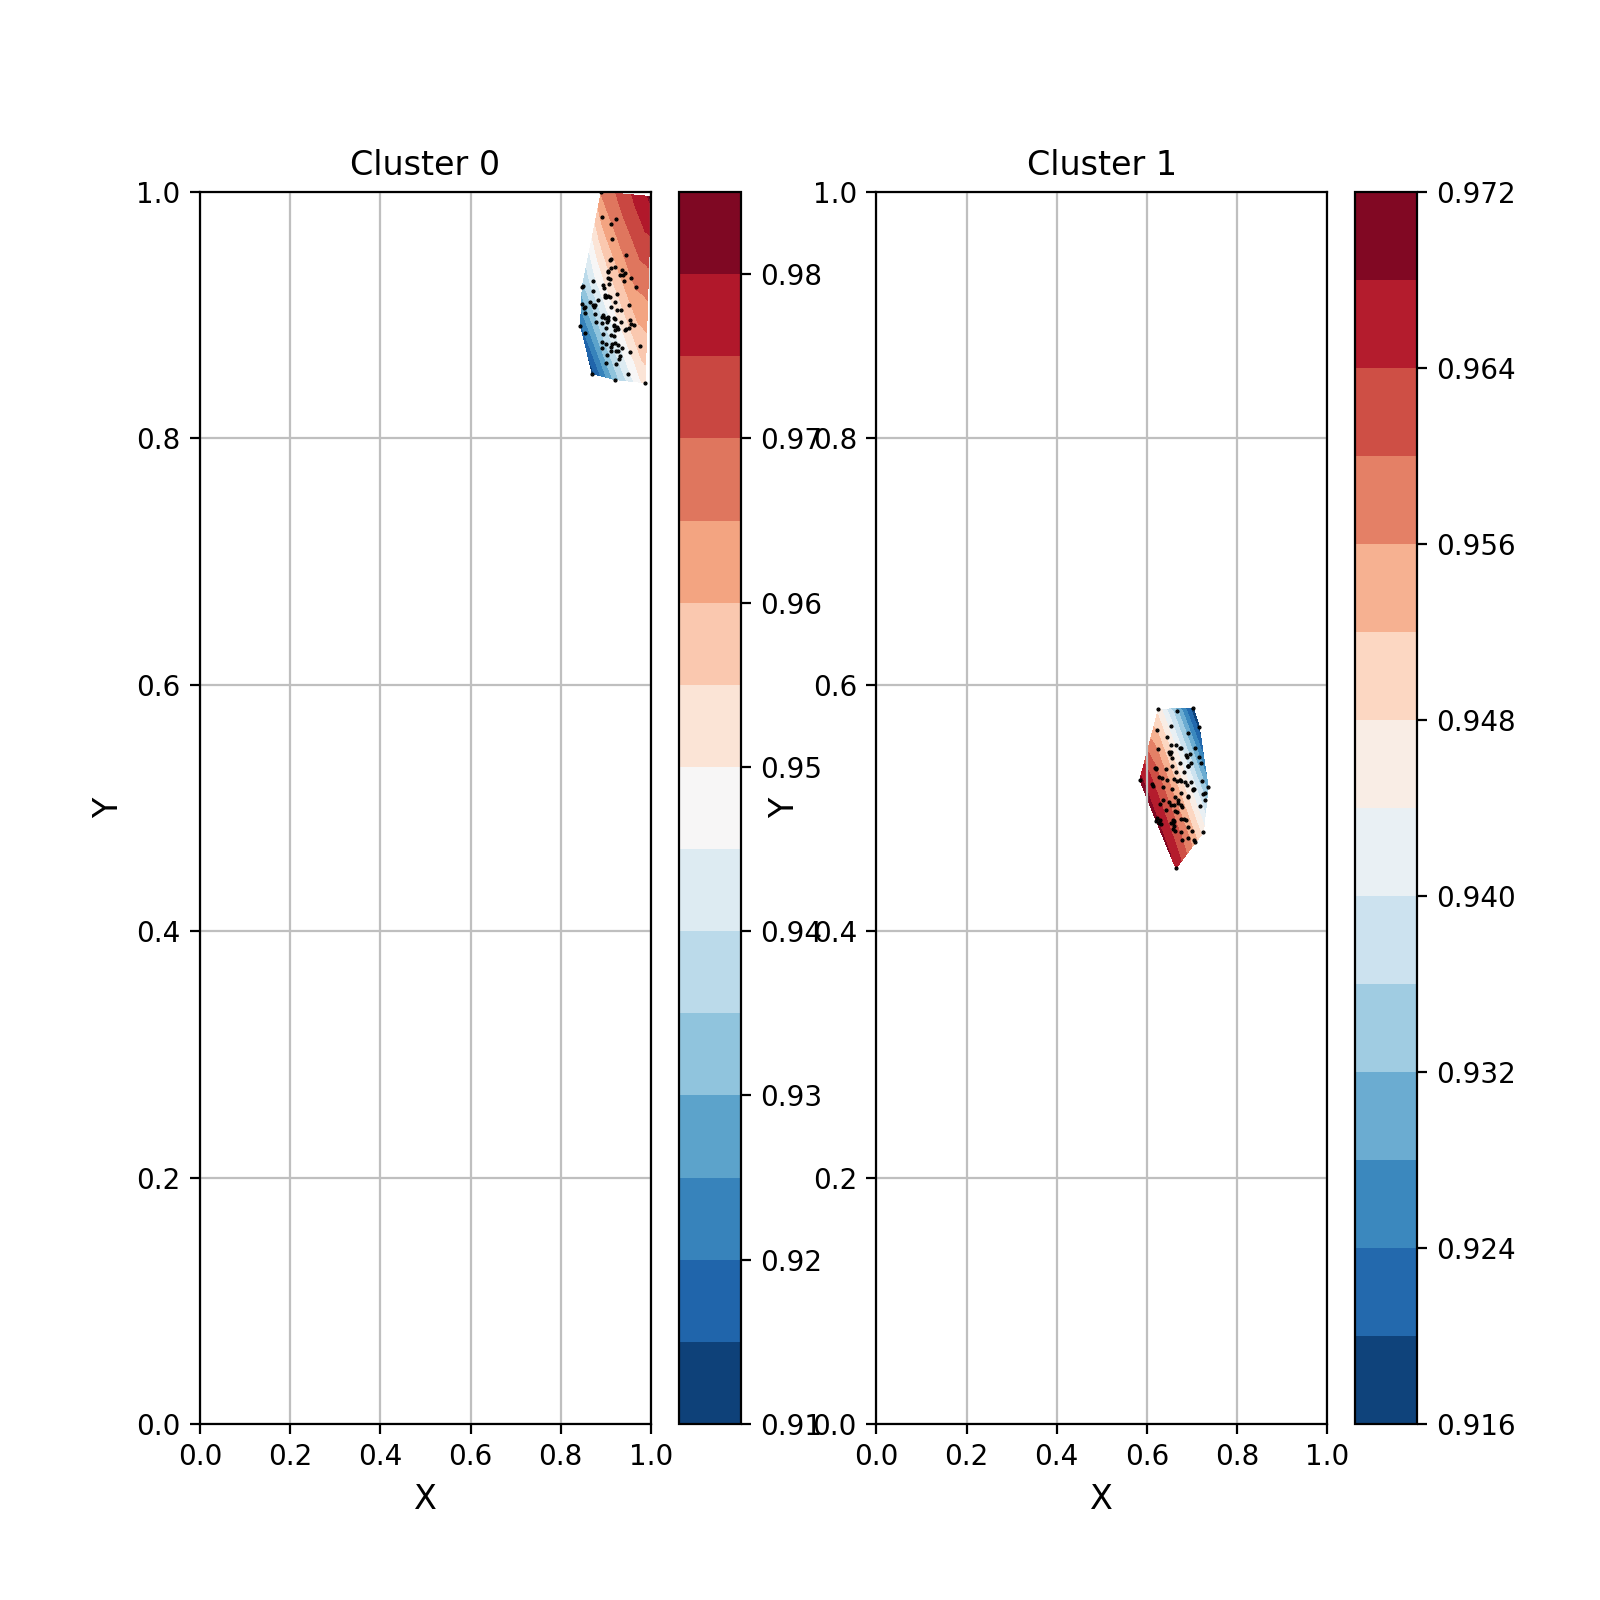

In [12]:
#plot out clusters memebership
fig = plt.figure(figsize=(8,8))
nplots = (int(np.ceil(len(unique_ks)/2)), 2)
for i in range(len(unique_ks)):
    data_contour, scores, _ = unpack_results(pred,target=i)
    plot_countour(fig, data_contour,scores, sub_index=i+1,nplots=nplots)
# plt.savefig("part_contour_1.png")

## Cluster segmentation by argmax

In [13]:
def get_clusters(pred):
    ks = []
    for result in pred:
        #unpack prediction
        res = [score for _, score in result]
        idxMax = np.argmax(res)
        k, _ = result[idxMax]
        ks.append(k)
    return ks

In [14]:
ks = get_clusters(pred)

<IPython.core.display.Javascript object>


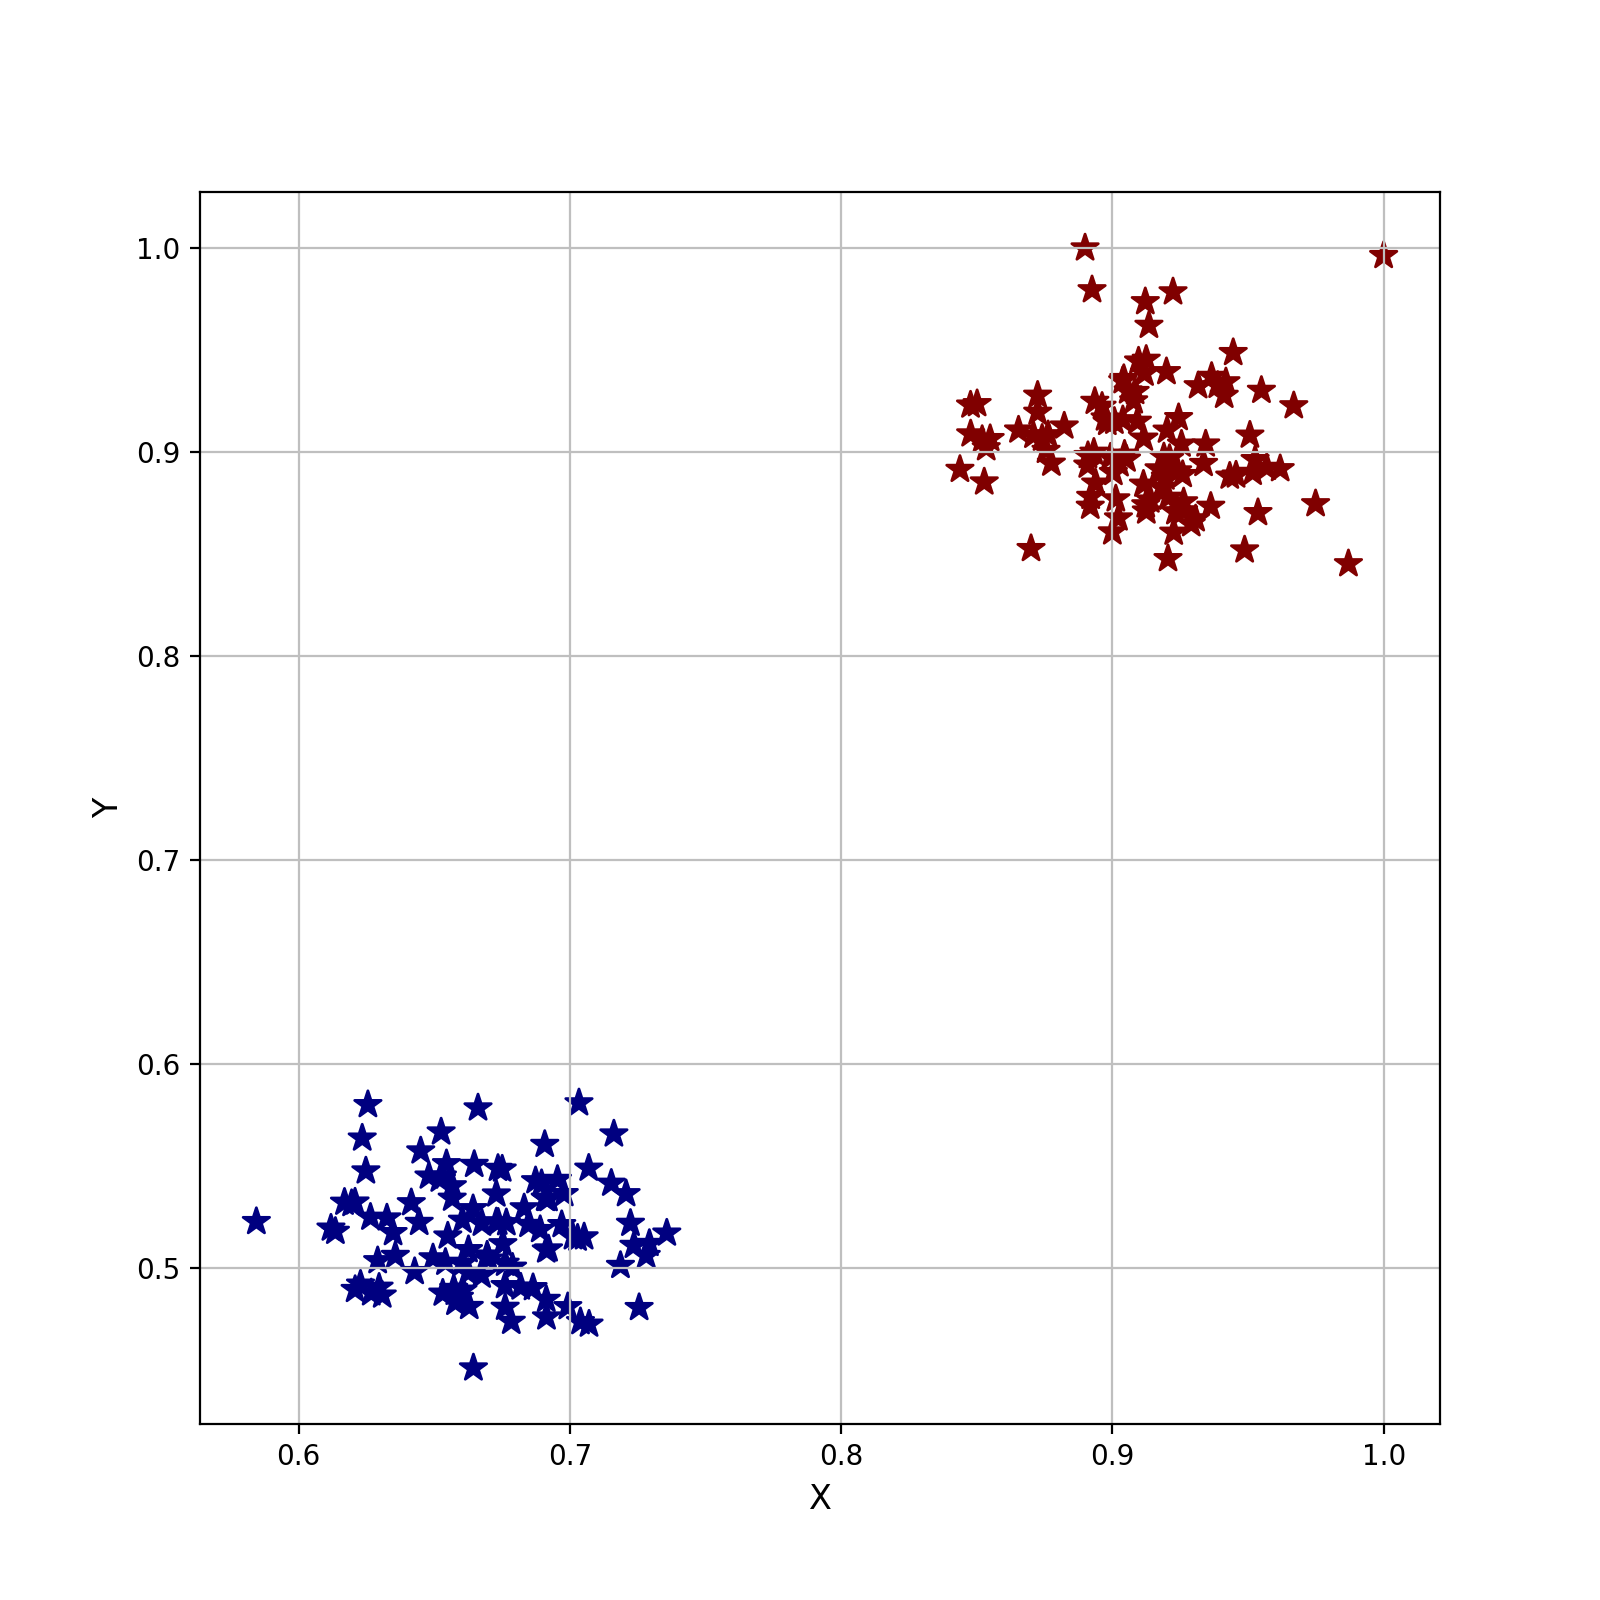

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# ax.set_title("pART's Predictions ",fontsize=14)
ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
# ax.set_ylabel("Z",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')
# scatter with colormap mapping to predicted class
color = [c for c in ks]
ax.scatter(sample_data.data_normalized[...,0],sample_data.data_normalized[...,1],s=100,c=color, marker = '*', cmap = cm.jet_r );

plt.show()
# plt.savefig("part_correct_1.png")

In [16]:
color

[0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0]

In [17]:
y

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1])

In [18]:
# dic = {1: 1,2: 0}
# color = list(map(lambda i: dic[i], color))

In [19]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, precision_score, recall_score, f1_score, accuracy_score, normalized_mutual_info_score

def obtain_metrics(x, y_true, y_pred):
    results = dict({})
    results["silhouette_score"] = silhouette_score(x, y_pred)
    results["davies_bouldin_score"] = davies_bouldin_score(x, y_pred)
    results["normalized_mutual_info_score"] = normalized_mutual_info_score(y_true, y_pred)
    results["precision_score"] = precision_score(y_true, y_pred)
    results["recall_score"] = recall_score(y_true, y_pred)
    results["f1_score"] = f1_score(y_true, y_pred)
    results["accuracy_score"] = accuracy_score(y_true, y_pred)
    return results

In [20]:
obtain_metrics(sample_data.data_normalized, 1-y, color)

{'silhouette_score': 0.8837076,
 'davies_bouldin_score': 0.16482717704930142,
 'normalized_mutual_info_score': 1.0,
 'precision_score': 1.0,
 'recall_score': 1.0,
 'f1_score': 1.0,
 'accuracy_score': 1.0}